## Non-linear dimensionalty reduction: Kernel PCA

The “classic” PCA approach described before is a linear projection technique that works well to find a suitable representation of the data if the data patters are linearly separable (e.g. the patterns we are interested in like categories of the data points could be split with a linear decision boundary in a space of principal components). Linear PCA also helps removing the correlations between the features, but only the linear correlations, while possible non-linear relations are not manageable by it. E.g. linear PCA won't help figuring out a one-dimensional projection $(x_1,x_2)\to x$ for the two-dimensional dataset having two clearly related but not linearly correlated features $x_1=x+1, x_2=x^2$.

In the case of linearly inseparable data or data with non-linear relations, a nonlinear technique is required if the task is to reduce the dimensionality of a dataset. Kernel PCA is one of the common non-linear techniques used for this purpose.

## Kernel PCA

The basic idea to deal with linearly inseparable data is to project it onto a higher dimensional space where it becomes linearly separable. Let us call this nonlinear mapping function $ϕ$ so that the mapping of a sample $x$ can be written as $x→ϕ(x)$, which is called “kernel function.”
                                                      
In other words, the function $ϕ$ maps the original d-dimensional features into a larger, k-dimensional feature space by creating nononlinear combinations of the original features. For example, if $x$ consists of 2 features:

$$x = [x_1, x_2]^T, x∈R^d \to x' = [x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_1x_2^2 ... ]^T, x'∈R^k (k>d)$$


Here’s an easy argument to understand the process. Suppose the decision boundary is described by a third order polynomial $y = a + bx + cx^{2} + dx^{3}$. Now, plotting this function in the usual $x−y$ plane will produce a wavy non-linear curve. Suppose instead we go to a higher dimensionality space in which the axes are $x,x^{2}, x^{3}$
and $y$. In this 4D space the third order polynomial becomes a linear function and the decision boundary becomes a hyperplane. So the trick is to find a suitable transformation (up-scaling) of the dimensions to try and recover the linearity of the boundary.

A generic non-linear combination of the original variables will have a huge number of new variables which rapidly blows up the computational complexity of the problem. Remember, we won’t know the exact combination of non-linear terms we need, hence a large number of combinations are in principle required.
There is a solution to this problem, which is commonly referred to as the **kernel trick**.

#### Kernel trick

Denote by $x$ the original set of n variables (represented as a row of variables/components/features), and let $ϕ:R^n\to R^m$ be the non-linear combination (mapping) of these variables into a $m>n$ dimensional dataset. 

Linear PCA needs to compute eigenvectors of the covariance matrix 
$$X^T X$$
(up to a constant factor and assuming standardization), where $X$ is the $N\times n$ matrix incorporating $N$ observations for $n$ features and so $X^T X$ is $n\times n$ dimensional.

Now if we were to apply PCA over the $m$-dimensional expanded features space $\phi(x)$, including non-linear combinations of the original features, we'll need to operate with the eigenvectors of 
$$ϕ(X)^T ϕ(X)$$
which would be a $m\times m$ matrix, that could be virtually untrackable for large $m$, not to speak of computing its eigenvectors.

Instead of operating the $m\times m$ matrixes the kernel trick proposes to consider a dimension-flip in this product replacing it by what is called a **kernel matrix** 
$$K = ϕ(X)ϕ(X)^T$$ 
which would be an $N\times N$ dimensional matrix. This way the kernel matrix $K$ is $N\times N$ dimensional (by the number of data points, which could be still large but not as large as the full dimensionality of the expanded feature space $ϕ(x)$ needed to capture essential nonlinearities in the data).

Of course there is no direct relation between $ϕ(X)^T ϕ(X)$ and $ϕ(X)ϕ(X)^T$ and one can not see one as a proxy for the other. But it turns out that the $N\times N$ kernel matrix $K$ itself could effectively replace the $m\times m$ matrix $ϕ(X)^T ϕ(X)$ and play a similar role that as the $n\times n$ covariance matrix $X^T X$ did for the linear PCA. 

The kernel trick is called this way because the kernel matrix enables getting the final feature transormation (non-linear principal components) directly through the eigenvectors $v$ of the kernel matrix $K$ without computing the rotation of the expanded $m$-dimensional feature space $ϕ(x)$ effectively skipping the intracable eigendecomposition of the $m\times m$ matrix $ϕ(X)^T ϕ(X)$. 

The kernel PCA is trained on a sample of available data points, while for any new, out-of-sample data point $x$ the kernel PCA will find its principal components as the dot products $v_j^T\cdot\left(k(x,x^i),i=\overline{1..N}\right)$ where $v_j$ are the leading eigenvectors of $K$. Note that for this to hold, one needs to make sure the projected data $\phi(x^i)$ also have zero mean, like the original data does, otherwise an appropriate correction for the matrix $K$ is necessary. More detail in https://arxiv.org/pdf/1207.3538.pdf 

Another part of the kernel trick is skipping the multidimensional matrix $ϕ(X)$ and vectors $ϕ(x)$ altogether.
The kernel matrix 
$$K=\left(k(x^i, x^j), i,j=\overline{1..N}\right)$$ 
is composed of the elements $k(x^i, x^j)$ computed for each pair of $N$ data points, where

$$k(x, y) = ϕ(x) ϕ(y)^T$$

i.e. being a dot product of the expanded feature vectors for any pair of points $x,y$. But while those vectors themselves are multidimensional, their product convolves to a single number.

So the other part of the trick suggests a direct functional definition of $k(x, y)$ effectively bypassing the computation of $ϕ(x), ϕ(y)$.

#### Types of kernel functions

There are different choices for the kernel function/matrix. Different functional forms of the kernel function correspond to different types of non-linearity of the expanded feature space $ϕ(x)$.

Common ones are the Gaussian kernel (RBF) or the polynomial kernel. A polynomial kernel would be the right choice for discovering polynomial or algebraic patterns between the features. A Gaussian kernel is a good choice whenever one wants to distinguish data points based on their overall proximity.

Often, the mathematical definition of the polynomial kernel (of degree d) is written and implemented as
$$k(x,y)=(x y^T+c)^d$$

and for the RBF kernel:

$$k(x,y)=exp(−γ‖x−y‖^2)$$

where $c$ and $γ=1/(2σ^2)$ are free parameters that need to be chosen or optimized according to a certain final performance objective. 

The kernel function could be seen as defining some sort of a distance metric for each pair of the data points $x,y$. 

Once we have chosen the kernel, we follow the similar procedure as for the linear PCA, while the kernel matrix $K$ plays a similar role as the covariance matrix in linear PCA. Therefore we can calculate its eigenvectors to serve as the transformed features. We can choose a certain number of the leading principal components (eigenvectors of $K$) with the highest eigenvalues.

#### Next, we'll demonstrate with some examples where kernel PCA is helpful and linear PCA fails 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn import datasets
from sklearn.datasets import make_moons ## sklearn functions for synthetic data
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA  ## sklearn PCA classes
from sklearn.decomposition import KernelPCA
from sklearn import linear_model    ## sklearn linear model
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier ## sklearn decision trees
from sklearn.ensemble import RandomForestClassifier ## sklearn random forests 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_lfw_people 
from sklearn.metrics import classification_report 
from sklearn.svm import SVC 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image  
import pydotplus
import warnings
import random
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')
%matplotlib inline

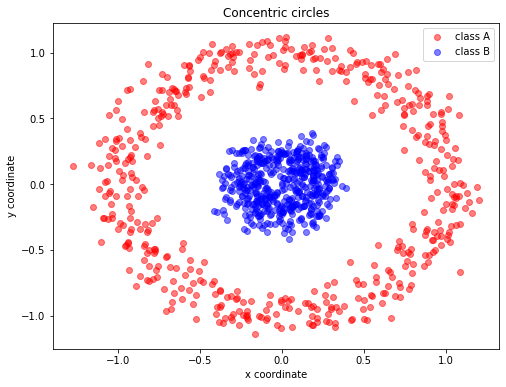

In [2]:
# example 1: concentric circles

#generate and plot the data

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5, label='class A')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5, label='class B')
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.legend()
plt.show()

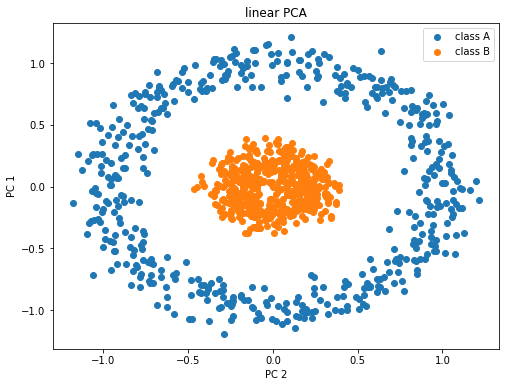

In [3]:
#transform the data using PCA; plot
plt.figure(figsize=(8,6))
clf = PCA(2) 
X_trans = clf.fit_transform(X)
plt.scatter(X_trans[y==0, 0], X_trans[y==0, 1], alpha=1, label='class A')
plt.scatter(X_trans[y==1, 0], X_trans[y==1, 1], alpha=1, label='class B')
plt.title('linear PCA')
plt.ylabel('PC 1')
plt.xlabel('PC 2')
plt.legend()

As we can see, linear PCA fails to separate this data through linearly separable boundary

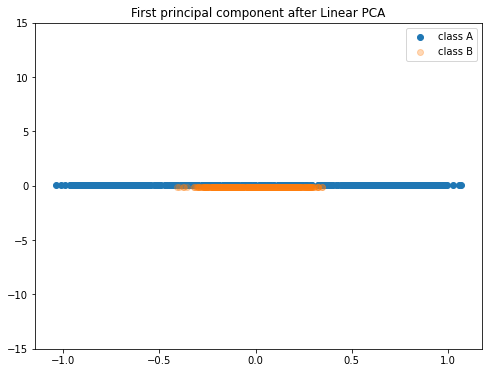

In [4]:
# plot the along the first principal component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_pca = pca.inverse_transform(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0], np.zeros((500,1))+0.1, alpha=1, label='class A')
plt.scatter(X_pca[y==1, 0], np.zeros((500,1))-0.1, alpha=0.3, label='class B')
plt.ylim([-15,15])
plt.title('First principal component after Linear PCA')
# plt.xlabel('PC1')
plt.legend()
plt.show()

We see that the data is indistinguishable along the first PC

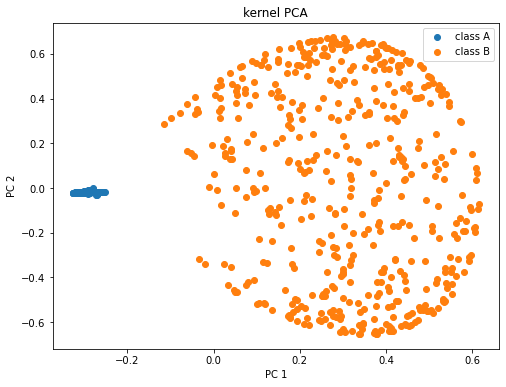

In [5]:
## try kernel PCA, we'll use 'rbf' kernel
## gamma is the hyperparameter to be selected (hand-picked or through grid having a certain objective criteria in mind),

plt.figure(figsize=(8,6))
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2)
X_kpca = kpca.fit_transform(X)

##plotting data along two PCs
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], alpha=1, label='class A')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], alpha=1, label='class B')
plt.title('kernel PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

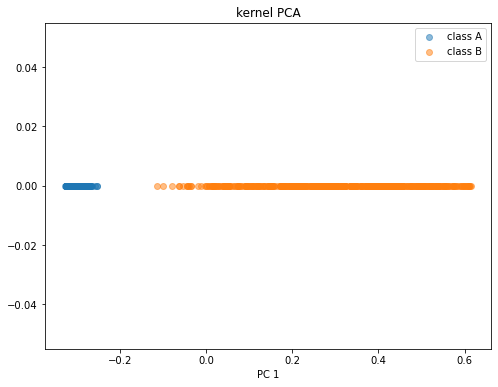

In [6]:
# plot data along just first PC

plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], np.zeros((len(X_kpca[y==0, 0]),1)), alpha=0.5, label='class A')
plt.scatter(X_kpca[y==1, 0], np.zeros((len(X_kpca[y==1, 0]),1)), alpha=0.5, label='class B')
plt.xlabel("PC 1")
plt.title('kernel PCA')
plt.legend()

The data is linearly separable along just the first PC, demonstrating the strength of kernel PCA in non-linear data case -  we just need one PC to classify the data

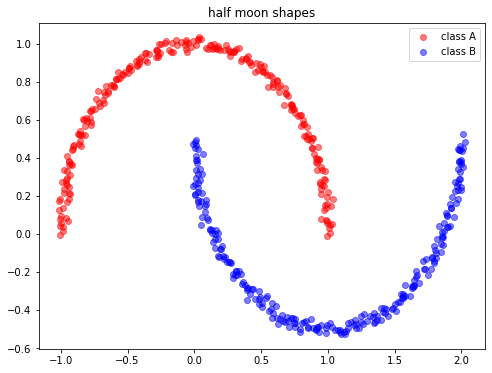

In [7]:
## example 2: half moon shapes
## plot the data

plt.figure(figsize=(8,6))
X, y = make_moons(n_samples = 500, noise = 0.02)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5, label='class A')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5, label='class B')
plt.title('half moon shapes')
plt.legend()

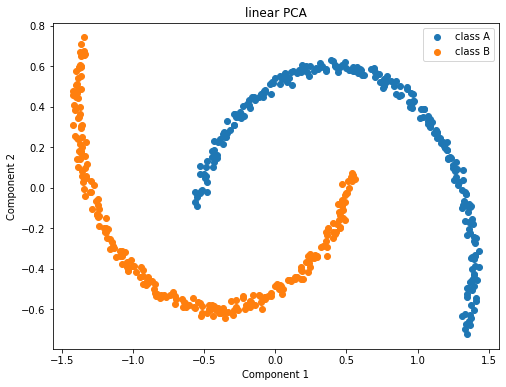

In [8]:
# apply linear PCA first and plot

plt.figure(figsize=(8,6))
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X) 
   
plt.title("linear PCA") 
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=1, label='class A')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=1, label='class B')
plt.xlabel("Component 1") 
plt.ylabel("Component 2")
plt.legend()

Again, the transformed data is not linearly separable

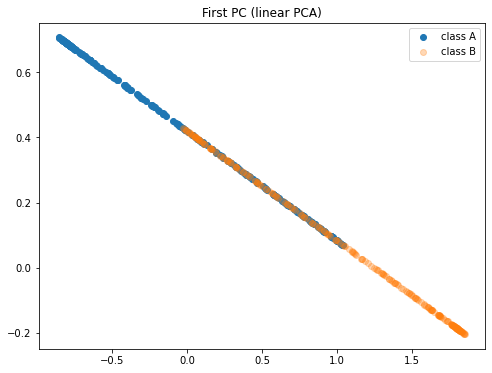

In [9]:
## plot first PC for linear PCA

plt.figure(figsize=(8,6))
clf = PCA(1) 
X_trans = clf.fit_transform(X)
X_new = clf.inverse_transform(X_trans) # transformed data
plt.scatter(X_new[y==0, 0], X_new[y==0, 1], alpha=1, label='class A')
plt.scatter(X_new[y==1, 0], X_new[y==1, 1], alpha=0.3, label='class B')
plt.title('First PC (linear PCA)')
plt.legend()
plt.show()

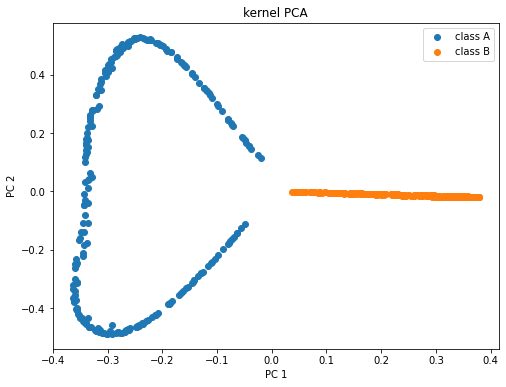

In [10]:
## try kernel PCA now
## gamma value should be optimized by fitting the data. Here, we use the value that works

plt.figure(figsize=(8,6))
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2)
X_kpca = kpca.fit_transform(X)
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], alpha=1, label='class A')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], alpha=1, label='class B')
plt.title('kernel PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

The transformed data through kernel PCA is now linearly separable

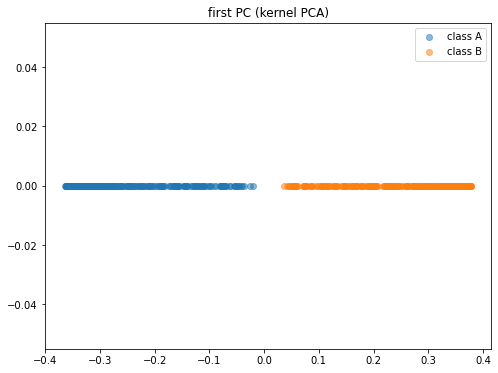

In [11]:
# lets plot the data along first PC

plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], np.zeros((len(X_kpca[y==0, 0]),1)), alpha=0.5, label='class A')
plt.scatter(X_kpca[y==1, 0], np.zeros((len(X_kpca[y==1, 0]),1)), alpha=0.5, label='class B')
plt.title('first PC (kernel PCA)')
plt.legend()
# plt.xlabel("PC 1")

The data is linearly separable along the first PC, so we just need 1 dimension after kernel PCA for distinguishing the two classes

### Social network ad data from kaggle

Next we'll use an example to check if kernel PCA performs better over some real data case. We use Social network ad purshase data which contains 400 records of users' age, gender and estimated salary and whether the user purchased an ad or not. 

We'll use linear PCA and kernel PCA along with Logistic regression to predict the probability of purchasing the ad and compare their prediction accuracy

In [12]:
# read data

dataAds = pd.read_csv('Social_Network_Ads.csv')
dataAds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


([<matplotlib.axis.XTick at 0x7faa384a2d60>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

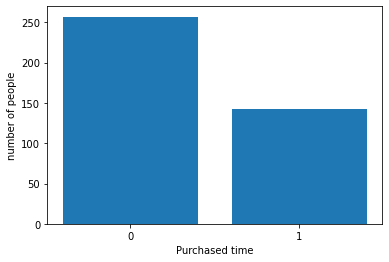

In [13]:
# check number of users who purchased (1) vs numbers who did not purchase (0)

# plot counts of target variable - type of wine

plt.bar(dataAds.Purchased.value_counts().index,dataAds.Purchased.value_counts().values)
plt.xlabel('Purchased time')
plt.ylabel('number of people')
plt.xticks(ticks=(0,1), labels=(0,1))

In [14]:
# we'll only use age and estimated salary as the input features

X = dataAds.iloc[:, [2, 3]].values
y = dataAds.iloc[:, 4].values

In [15]:
# scale the data and plot

sc = StandardScaler()
X = sc.fit_transform(X)

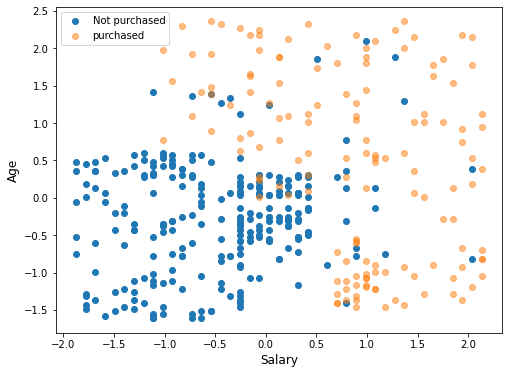

In [16]:
plt.figure(figsize=(8,6))
# plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.scatter(X[y==0, 0], X[y==0, 1], alpha=1, label='Not purchased')
plt.scatter(X[y==1, 0], X[y==1, 1], alpha=0.5, label='purchased')
plt.ylabel('Age', fontsize=12)
plt.xlabel('Salary', fontsize=12)
plt.legend()

We can see that the data does not look linearly separable. Next, we'll transform the data using PCA (linear and kernel) and check if they are able to linearly distinguish the two classes

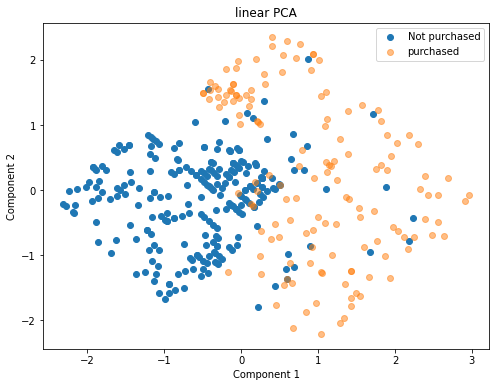

In [17]:
# try linear PCA first and plot 

plt.figure(figsize=(8,6))
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X) 
   
plt.title("linear PCA") 
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=1, label='Not purchased')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=0.5, label='purchased')
plt.xlabel("Component 1") 
plt.ylabel("Component 2")
plt.legend()

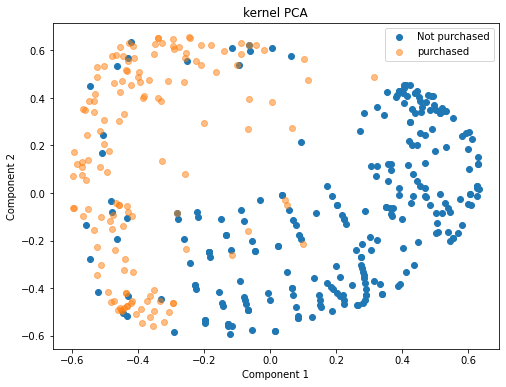

In [18]:
# kernel PCA with default hyperparameter values

plt.figure(figsize=(8,6))
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)
# plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y, alpha=0.8)
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], alpha=1, label='Not purchased')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], alpha=0.5, label='purchased')
plt.title("kernel PCA") 
plt.xlabel("Component 1") 
plt.ylabel("Component 2")
plt.legend()

While Kernel PCA transformation does not look entirely linearly separable, it certainly perfroms better in distinguishing two classes that linear PCA. Next, we'll compare their performace is classifying the data points along with Logistic regression as a classifier

In [19]:
## try just Logistic regression first and report accuracy

acc = []

for i in range(20):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    acc.append(classifier.score(X_test, y_test))

print(np.mean(acc))

0.8335000000000001


In [20]:
# Logistic regression with linear PCA

acc_pca = []

for i in range(20):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    pca = PCA(n_components = 2) 
    X_train_pca = pca.fit_transform(X_train) 
    X_test_pca = pca.transform(X_test)

    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train_pca, y_train)

    acc_pca.append(classifier.score(X_test_pca, y_test))
    
print(np.mean(acc_pca))

0.8425


No improvement over just Logistic regression!

In [21]:
## Logistic regression with kernel PCA

acc_kpca = []

for i in range(20):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    kpca = KernelPCA(kernel='rbf', n_components=2)
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train_kpca, y_train)

    acc_kpca.append(classifier.score(X_test_kpca, y_test))
    
print(np.mean(acc_kpca))

0.8720000000000001


We see some improvement in accuracy with kernel PCA with default hyperparameters!

Next, we'll use an example of multidimensional data to demonstrate the use of kernel PCA for dimensionality reduction tasks.

The data contains information of 13 chemicals and ingredients as features corresponding to 3 categories of wines. We'll use PCA to reduce the number of features and check if the data can be represented good enough using just 2D features after PCA transformation.

### UCI wine data

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [22]:
## read wine data from UCI ML database

wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/wine/wine.data', header=None)

wine.columns = ['wine_label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
                    'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
 'OD280 OD315 of diluted wines', 'Proline']
wine.head()

,wine_label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280 OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
wine.wine_label.value_counts().index

Int64Index([2, 1, 3], dtype='int64')

([<matplotlib.axis.XTick at 0x7faa4956f040>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

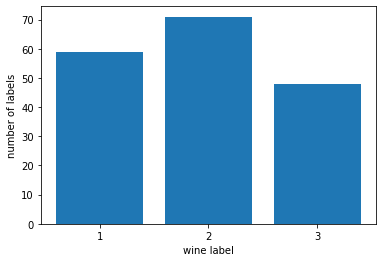

In [24]:
# plot counts of target variable - type of wine

plt.bar(wine.wine_label.value_counts().index,wine.wine_label.value_counts().values)
plt.xlabel('wine label')
plt.ylabel('number of labels')
plt.xticks(ticks=(1,2,3), labels=(1,2,3))

In [25]:
# assign X as feature set, y as target var

X = wine.iloc[:, 1:]
y = wine.iloc[:, 0]
X.shape

(178, 13)

In [26]:
# standardize the data

sc = StandardScaler()
X = sc.fit_transform(X)

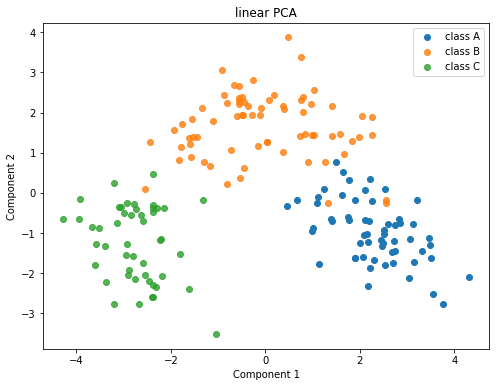

In [27]:
# linear PCA and plotting the 2D transformation of the data

pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X) 
   
plt.figure(figsize=(8,6))
plt.title("PCA") 
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=1, label='class A')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], alpha=0.8, label='class B')
plt.scatter(X_pca[y==3, 0], X_pca[y==3, 1], alpha=0.8, label='class C')
plt.title("linear PCA") 
plt.xlabel("Component 1") 
plt.ylabel("Component 2")
plt.legend()

Linear PCA transformation seems good enough except for some points in class 1 and 2 getting mixed up

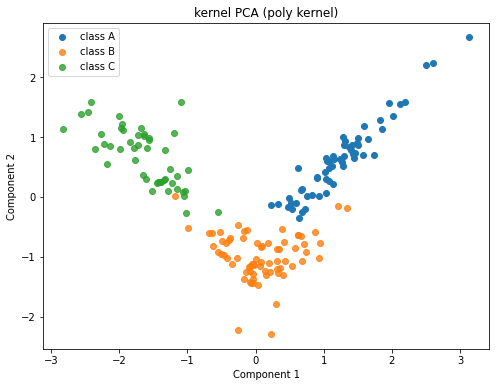

In [28]:
# kernel PCA - try polynomial kernel first

plt.figure(figsize=(8,6))
kpca = KernelPCA(kernel='poly', n_components=2)
X_kpca = kpca.fit_transform(X)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], alpha=1, label='class A')
plt.scatter(X_kpca[y==2, 0], X_kpca[y==2, 1], alpha=0.8, label='class B')
plt.scatter(X_kpca[y==3, 0], X_kpca[y==3, 1], alpha=0.8, label='class C')
plt.title("kernel PCA (poly kernel)") 
plt.xlabel("Component 1") 
plt.ylabel("Component 2")
plt.legend()

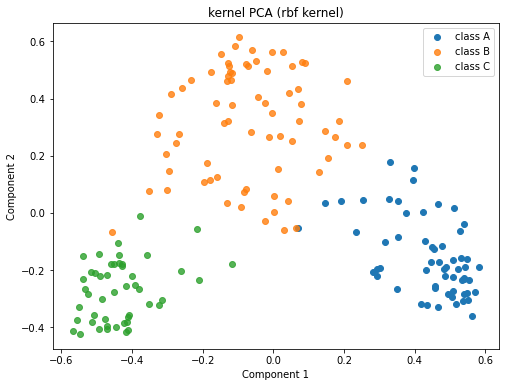

In [29]:
# try with rbf kernel

plt.figure(figsize=(8,6))
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], alpha=1, label='class A')
plt.scatter(X_kpca[y==2, 0], X_kpca[y==2, 1], alpha=0.8, label='class B')
plt.scatter(X_kpca[y==3, 0], X_kpca[y==3, 1], alpha=0.8, label='class C')
plt.title("kernel PCA (rbf kernel)") 
plt.xlabel("Component 1") 
plt.ylabel("Component 2")
plt.legend()

Kernel PCA does a good job in the data transformation. It looks like the data can be now linearly separated well with a linear classifier. 

### HW assignment 1

Implement a logistic regression over kernel PCA, tuning the hyperparameter 'gamma' in the kernel PCA for above wine classification example and report the highest accuracy. Use training-validation-test split for model training, hyperparameter selection and final model evaluation. 

Do a single random split for train, validation and test data (Use 60-20-20 ratio, create validation data out of training sample). Tune the gamma parameter by evaluating accuracy over validation sample (use np.linspace(0.001, 0.1, 20) as the range). Finally, report the accuracy over the test sample using the model fitted with optimal gamma parameter.

In [30]:
#Do a single random split for train, validation and test
#data (Use 60-20-20 ratio create validation data out of training sample).
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 123)  # train-test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,random_state = 123) 


In [31]:
#tune the gamma parameter by evaluating accuracy over validation sample 
#(use np.linspace(0.001, 0.1, 20) as the range)
#create a list to store the perfomance
acc_kpca=[]
for i in np.linspace(0.001, 0.1, 20):
    kpca = KernelPCA(kernel='rbf', n_components=2,gamma=i)
    X_kpca_train = kpca.fit_transform(X_train)
    X_kpca_val = kpca.transform(X_val)
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_kpca_train, y_train)
    score=classifier.score(X_kpca_val, y_val) 
    acc_kpca.append(score)

In [32]:
gamma=np.linspace(0.001, 0.1, 20)
optimal_gamma = gamma[np.argmax(acc_kpca)]
optimal_gamma

0.011421052631578946

In [33]:
acc_kpca

[0.6111111111111112,
 0.9444444444444444,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222]

In [34]:
# use the best gamma
kpca = KernelPCA(kernel='rbf', n_components=2,gamma=optimal_gamma)
X_kpca_train = kpca.fit_transform(X_train)
X_kpca_test = kpca.transform(X_test)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_kpca_train, y_train)
print('the accuracy over the test sample using the model fitted with optimal gamma parameter:',classifier.score(X_kpca_test, y_test))

the accuracy over the test sample using the model fitted with optimal gamma parameter: 0.8888888888888888


## Random forests

Random forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest implements a class label prediction based on a sequence of condition checks and the class with the most votes becomes our model’s prediction. The fundamental concept behind random forest is a simple but powerful one - A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. The low correlation between models is the key. Uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions.

**Put simply: random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.**

One big advantage of random forest is that it can be used for both classification and regression problems, which form the majority of current machine learning systems. 

#### Decision trees

A decision tree is the building block of a random forest and is an intuitive model. It is a set of rules that can be learned from data and used to predict an unknown value. A decision tree is learned as follows:
 
- Start with all data points in a single node. Predict the most common value (classification) or mean value (regression).
- Choose the “best” binary decision rule, and use it to split the data into two groups.
- Repeat this for each non-terminal node of the tree, until some stopping criterion is reached.


The 'best' rule is based on calculating information gain. Information gain is an information- theoretic measure of how well the split separates the data. For regression tasks, we use the mean squared error criteria.


<img src="RF.jpeg">

### Important hyperparameters

The hyperparameters in random forest are either used to increase the predictive power of the model or to make the model faster.

- Firstly, there is the n_estimators hyperparameter, which is just the number of trees the algorithm builds before taking the maximum voting or taking the averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.

- Another important hyperparameter is max_features, which is the maximum number of features random forest considers to split a node.

- max_depth parameter is used to control the depths of trees in the model. More depth could lead to overfitting, so it is quite important to optimize this.


The detailed discussion on random forests and decision trees can be found here: https://towardsdatascience.com/understanding-random-forest-58381e0602d2

Next, we'll use an example to demonstrate the use of random forests classifier

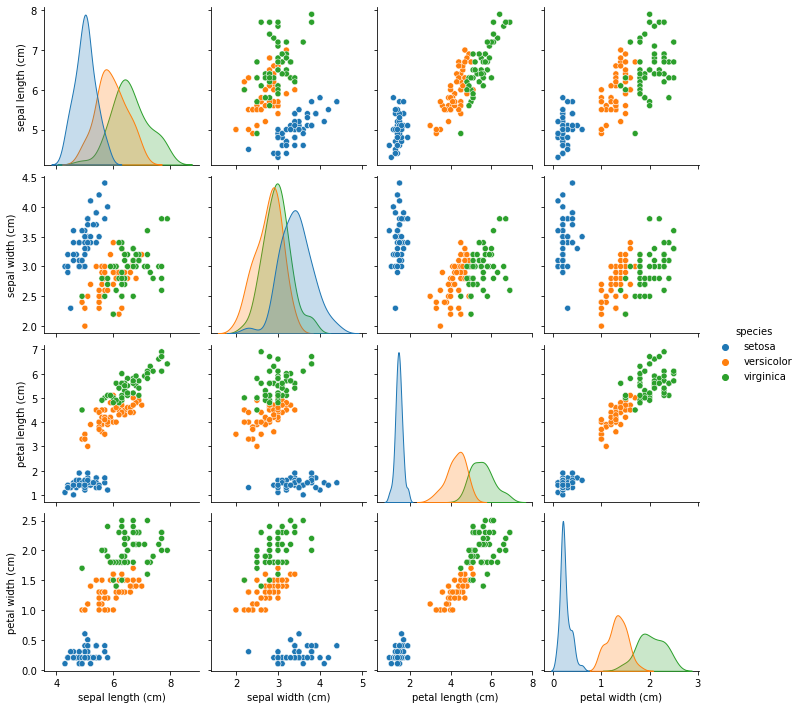

In [35]:
# load iris data and plot scatter plots of features

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
# sklearn provides the iris species as integer values since this is required for classification
# here we're just adding a column with the species names to the dataframe for visualisation
df['species'] = np.array([iris.target_names[i] for i in iris.target])
sns.pairplot(df, hue='species')

In [36]:
## train the model with random forests classifer and report test accuracy

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], 
                                                    iris.target, test_size=0.5, 
                                                    stratify=iris.target, random_state=123456)



#### Let's first train and visualize a decsion tree classifier on this data

In [37]:
dt = DecisionTreeClassifier(max_depth=2) # just to keep it simple for visualization
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

If you want to install GraphViz on your own machine:

conda install graphviz

pip install pydot

pip install pydotplus

For people who experienced this error: "GraphViz's executables not found"

http://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8

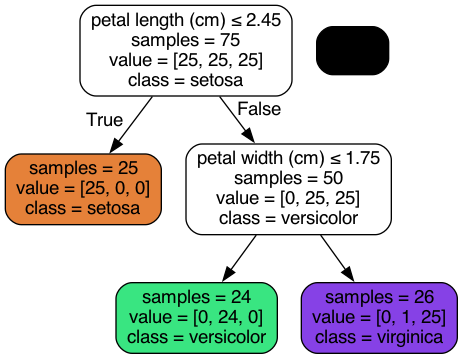

In [38]:
# display the output using www.webgraphviz.com, or if you have GraphViz installed on
# your computer, you can use this

# This will only work if GraphViz is installed on your machine
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['setosa','versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

This structure represents a decision tree classifier with maximum depth of 2. The root node (top node) describes the first split (here based on petal length). The samples represent the total data points and value array denotes the number of observations for each class. We split the data based on splits chosen by the algorithm until some stopping criteria is reached or the data is fully categorized.

Random forests are collection of individual decision trees trained on different subsets and features of data and then averaged to give final results.

Next, let's train random forests classifier on the same data

In [39]:
rf = RandomForestClassifier(max_depth=2, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.933


Above, we initialized and fit a random forests classifier over the data. Here, we have just chosen 'max_depth' as the parameter to control (which is maximum tree depth) and used default number of trees n_estimators=100. We then test the performace over the test data. 

Let us visualize a few decision trees built by the model

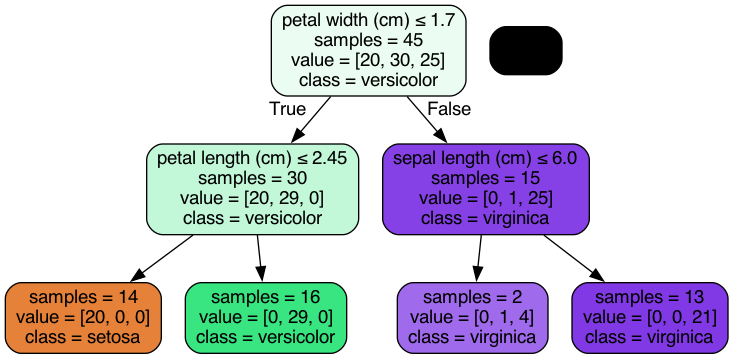

In [40]:
# individual trees can be accessed by the 'estimators_' function

dt1 = rf.estimators_[0]
dt2 = rf.estimators_[1]

# tree 1 
thestring = tree.export_graphviz(dt1, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['setosa','versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  


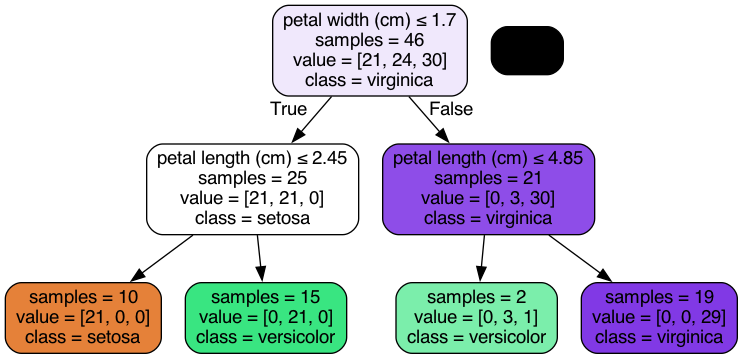

In [41]:
# tree 2 
thestring = tree.export_graphviz(dt2, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['setosa','versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

The above are the first two trees estimated by the random forest model. We can specify the number of trees in the 'n_estimators' parameter. We can see that the two trees use different subsets of data (the 'samples' number and 'values' array are different). The result of the model is determined by the average of all the trees estimated.

In [42]:
# confusion matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
cm

,setosa,versicolor,virginica
setosa,25,0,0
versicolor,0,25,0
virginica,0,5,20


### Next, let's try the random forests on the wine dataset used before. We'll also compare it's performance when used with PCA and kernel PCA transformations

In [43]:
## make X as features and y as target wine label

X = wine.iloc[:, 1:]
y = wine.iloc[:, 0]
X.shape

(178, 13)

In [44]:
## train-test split

X_train,X_test, y_train,y_test=train_test_split(X,y ,test_size=0.4,random_state=0) 

In [45]:
## try random forest first (we'll just use 'n_estimators' as a parameter here)

rf = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'accuracy score: {accuracy:.3}')

accuracy score: 0.958


In [46]:
## try linear PCA with random forests

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [47]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=123456)
rf.fit(X_train_pca, y_train)

predicted = rf.predict(X_test_pca)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.958


In [48]:
## try kernel PCA with random forests

kpca = KernelPCA(kernel='poly', n_components=2)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

rf = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=123456)
rf.fit(X_train_kpca, y_train)

predicted = rf.predict(X_test_kpca)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.986


### Parameter regularization 

Like decision tress, random forest model has different parameters which can be controlled to optimize the performance. This is quite important in order to prevent model overfitting. Model parameters should ideally be optimized over validation data and test data should be used just for final evaluation purposes.

Let's manually try optimizing a few parameters for the model fitted on above data.

In [49]:
# split data into training, validation and test first

X = wine.iloc[:, 1:]
y = wine.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # train-test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25) # further split train data into validation

In [50]:
# optimize the max_depth parameter

for depth in range(2, 11): # try 2-10 depths
    
    rf = RandomForestClassifier(max_depth=depth)
    rf.fit(X_train, y_train)

    predicted = rf.predict(X_val)
    accuracy = accuracy_score(y_val, predicted)
    print(f'validation accuracy score for', depth, 'max_depth: ', accuracy)

validation accuracy score for 2 max_depth:  0.9444444444444444
validation accuracy score for 3 max_depth:  0.9166666666666666
validation accuracy score for 4 max_depth:  0.9444444444444444
validation accuracy score for 5 max_depth:  0.9444444444444444
validation accuracy score for 6 max_depth:  0.9444444444444444
validation accuracy score for 7 max_depth:  0.9444444444444444
validation accuracy score for 8 max_depth:  0.9444444444444444
validation accuracy score for 9 max_depth:  0.9444444444444444
validation accuracy score for 10 max_depth:  0.9444444444444444


Observe that the accuracy is highest both for 5 and 9 max depths. We'll consider 5 as the optimal depth parameter (the model is simpler in that way)

In [51]:
# optimize the max_leaf_nodes parameter

for nodes in np.linspace(20, 50, 10): 
    
    rf = RandomForestClassifier(max_depth=5, max_leaf_nodes=int(nodes))
    rf.fit(X_train, y_train)

    predicted = rf.predict(X_val)
    accuracy = accuracy_score(y_val, predicted)
    print(f'validation accuracy score for', int(nodes), 'max_depth: ', accuracy)

validation accuracy score for 20 max_depth:  0.9444444444444444
validation accuracy score for 23 max_depth:  0.9444444444444444
validation accuracy score for 26 max_depth:  0.9444444444444444
validation accuracy score for 30 max_depth:  0.9444444444444444
validation accuracy score for 33 max_depth:  0.9166666666666666
validation accuracy score for 36 max_depth:  0.9444444444444444
validation accuracy score for 40 max_depth:  0.9444444444444444
validation accuracy score for 43 max_depth:  0.9444444444444444
validation accuracy score for 46 max_depth:  0.9444444444444444
validation accuracy score for 50 max_depth:  0.9444444444444444


We similarly find the optimal value for max leaf nodes parameter to be 26

In [52]:
## check test accuracy now

rf = RandomForestClassifier(max_depth=5, max_leaf_nodes=26)
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
accuracy

0.9444444444444444

After optimizing just two parameters, we have already improved the accuracy of the model than what we obtained previously without any regularization. 

Instead of finding the optimal values manually, we can use Grid search method to get all best values. This approach helps us find combination of best model parameter values based on performace on validation data.

### Homework assignment 2

### Face detection using PCA

Here we will try PCA and kernel PCA along with a classification model on a image face recognition task. Images usually have large number of features and PCA techniques can help significantly in reducing the complexity of models.

In [53]:
# this command will download the LFW_people's dataset to hard disk. 
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4) 
  
# the images arrays to find the shapes (for plotting) 
n_samples, h, w = lfw_people.images.shape 
  
# Instead of providing 2D data, X has data already in the form  of a vector that 
# is required in this approach. 
X = lfw_people.data 
n_features = X.shape[1] 
  
# the label to predict is the id of the person 
y = lfw_people.target 
target_names = lfw_people.target_names 
n_classes = target_names.shape[0] 
  
# Print details about dataset 
print("Number of Data Samples: % d" % n_samples) 
print("Number of features: % d" % n_features) 
print("Number of Class Labels: % d" % n_classes) 

Number of Data Samples:  1288
Number of features:  1850
Number of Class Labels:  7


So we have 1288 data points in total with 7 face labels. Notice the large number of features present in the data. There are 1850 features which represent the grayscale pixel values of images. With large number of variables and relatively low amount of data points, use of dimensionalty reduction techniques becomes even more important in model fitting and overall accuracy.

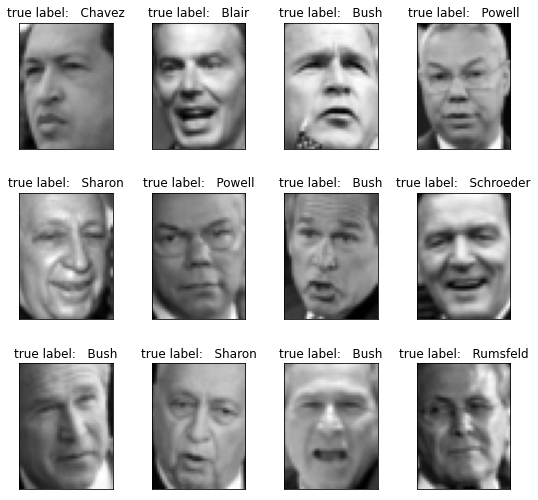

In [54]:
# Function to plot images in 3 * 4   
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4): 
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row)) 
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35) 
    for i in range(n_row * n_col): 
        plt.subplot(n_row, n_col, i + 1) 
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray) 
        plt.title(titles[i], size = 12) 
        plt.xticks(()) 
        plt.yticks(()) 
  
#Generate true labels above the images 
def true_title(Y, target_names, i): 
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1] 
    return 'true label:   % s' % (true_name) 
  
true_titles = [true_title(y, target_names, i) 
                     for i in range(y.shape[0])] 
plot_gallery(X, true_titles, h, w) 

In [55]:
# split data into training and testing (use 80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [56]:
# try linear PCA first, use number of components = 150
# transform training and testing data with PCA

#standlization first
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#linear PCA
pca = PCA(n_components = 150)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [57]:
max(y),min(y)

(6, 0)

Text(0, 0.5, 'Component 2')

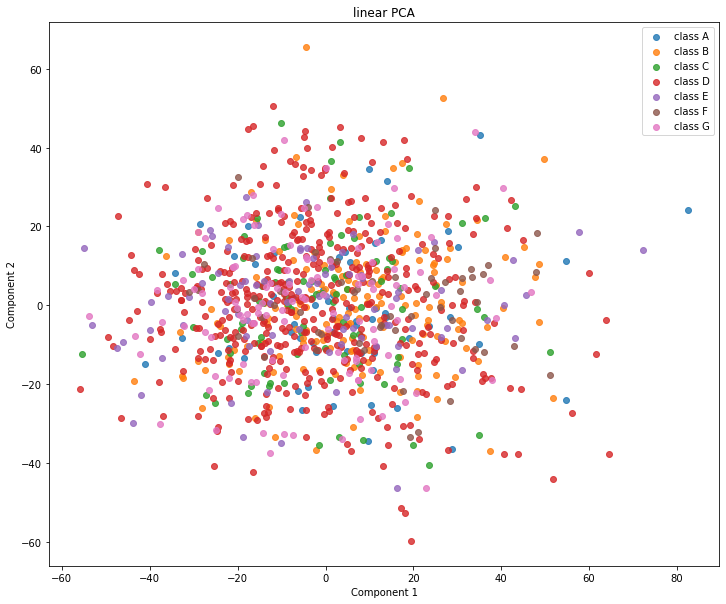

In [58]:
# visualize the transformed data in 2D using first two leading PCs, coloring the data points by label

#set the figure
plt.figure(figsize=(12,10))
plt.title("linear PCA") 

plt.scatter(X_pca_train[y_train==0, 0], X_pca_train[y_train==0, 1], alpha=0.8, label='class A')
plt.scatter(X_pca_train[y_train==1, 0], X_pca_train[y_train==1, 1], alpha=0.8, label='class B')
plt.scatter(X_pca_train[y_train==2, 0], X_pca_train[y_train==2, 1], alpha=0.8, label='class C')
plt.scatter(X_pca_train[y_train==3, 0], X_pca_train[y_train==3, 1], alpha=0.8, label='class D')
plt.scatter(X_pca_train[y_train==4, 0], X_pca_train[y_train==4, 1], alpha=0.8, label='class E')
plt.scatter(X_pca_train[y_train==5, 0], X_pca_train[y_train==5, 1], alpha=0.8, label='class F')
plt.scatter(X_pca_train[y_train==6, 0], X_pca_train[y_train==6, 1], alpha=0.8, label='class G')
#set the legend
plt.legend()

#set the asxies

plt.xlabel('Component 1') 
plt.ylabel('Component 2')



In [59]:
# use SVM classifier as the learning model, fix parameter C=1000 and kernel='linear'
# fit the model with above transformed data

SVM= SVC(C=1000,kernel='linear')
SVM.fit(X_pca_train, y_train)


SVC(C=1000, kernel='linear')

In [60]:
# print the confusion matrix and accuracy of the prediction on test data
predicted = SVM.predict(X_pca_test)
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=set(y), index=set(y))
cm

,0,1,2,3,4,5,6
0,13,0,1,1,0,1,0
1,7,44,2,4,1,1,1
2,2,1,18,3,0,0,1
3,0,4,3,87,0,0,3
4,0,1,1,1,17,0,1
5,2,0,0,1,0,11,0
6,0,0,0,2,2,0,21


In [61]:
accuracy = accuracy_score(y_test, predicted)
print('accuracy of the prediction on test data:',accuracy)

accuracy of the prediction on test data: 0.8178294573643411


In [62]:
# create validation data by further splitting training data (use 80:20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state = 123) 

In [63]:
random.seed(123)
acc_kpca = []
for i in np.linspace(0.0001, 0.01, 20):
    kpca = KernelPCA(kernel='rbf', n_components=150,gamma=i)
    X_train_kpca = kpca.fit_transform(X_train)
    X_val_kpca = kpca.transform(X_val)
    SVM = SVC(C=1000,kernel='linear')
    SVM.fit(X_train_kpca, y_train)
    score=SVM.score(X_val_kpca, y_val)
    acc_kpca.append(score)
    

In [64]:
gamma=np.linspace(0.001, 0.1, 20)
optimal_gamma = gamma[np.argmax(acc_kpca)]
optimal_gamma

0.001

In [65]:
acc_kpca

[0.7766990291262136,
 0.7475728155339806,
 0.6990291262135923,
 0.616504854368932,
 0.529126213592233,
 0.48058252427184467,
 0.470873786407767,
 0.4563106796116505,
 0.46116504854368934,
 0.441747572815534,
 0.44660194174757284,
 0.441747572815534,
 0.441747572815534,
 0.4320388349514563,
 0.4223300970873786,
 0.4223300970873786,
 0.4223300970873786,
 0.4223300970873786,
 0.4223300970873786,
 0.4223300970873786]

Text(0, 0.5, 'Component 2')

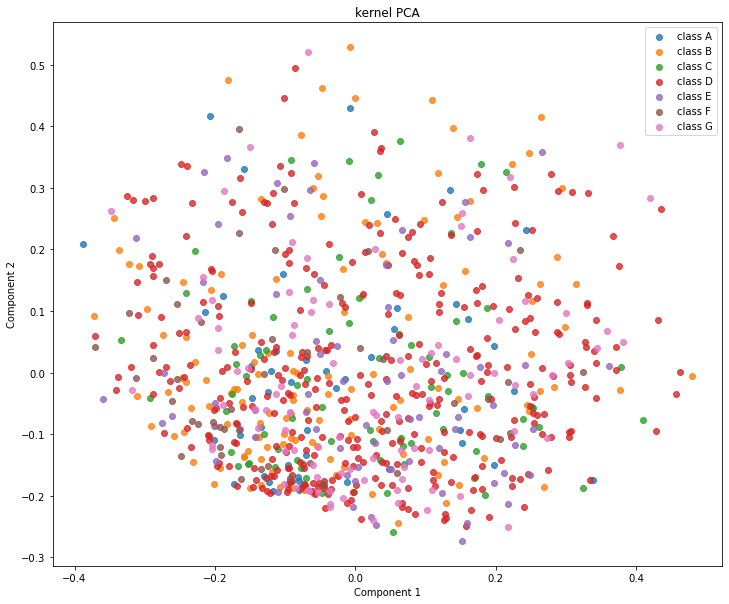

In [66]:
# visualize the transformed data from kernel PCA (using tuned gamma value) in 2D using first two leading PCs
# color the data points by label
#use the optimal_gamma
kpca = KernelPCA(kernel='rbf', n_components=150, gamma=optimal_gamma)
X_kpca_train = kpca.fit_transform(X_train)
X_kpca_val = kpca.transform(X_val)

plt.figure(figsize=(12,10))
plt.title("kernel PCA") 

plt.scatter(X_kpca_train[y_train==0, 0], X_kpca_train[y_train==0, 1], alpha=0.8, label='class A')
plt.scatter(X_kpca_train[y_train==1, 0], X_kpca_train[y_train==1, 1], alpha=0.8, label='class B')
plt.scatter(X_kpca_train[y_train==2, 0], X_kpca_train[y_train==2, 1], alpha=0.8, label='class C')
plt.scatter(X_kpca_train[y_train==3, 0], X_kpca_train[y_train==3, 1], alpha=0.8, label='class D')
plt.scatter(X_kpca_train[y_train==4, 0], X_kpca_train[y_train==4, 1], alpha=0.8, label='class E')
plt.scatter(X_kpca_train[y_train==5, 0], X_kpca_train[y_train==5, 1], alpha=0.8, label='class F')
plt.scatter(X_kpca_train[y_train==6, 0], X_kpca_train[y_train==6, 1], alpha=0.8, label='class G')
#set the legend
plt.legend()

#set the asxies

plt.xlabel('Component 1') 
plt.ylabel('Component 2')


In [67]:
# print the confusion matrix and accuracy of the prediction on test data
kpca = KernelPCA(kernel='rbf', n_components=150, gamma=optimal_gamma)
X_kpca_train = kpca.fit_transform(X_train)
X_kpca_test = kpca.transform(X_test)

SVM = SVC(C=1000,kernel='linear')
SVM.fit(X_kpca_train, y_train)
predicted = SVM.predict(X_kpca_test)
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=set(y), index=set(y))
cm

,0,1,2,3,4,5,6
0,6,3,1,6,0,0,0
1,0,40,2,16,0,0,2
2,0,1,14,10,0,0,0
3,0,1,0,95,0,0,1
4,0,0,0,9,9,0,3
5,0,0,0,6,1,7,0
6,0,2,1,7,1,0,14


In [68]:
accuracy = accuracy_score(y_test, predicted)
print('accuracy of the prediction on test data:',accuracy)

accuracy of the prediction on test data: 0.7170542635658915


#### comment on the results obtained by two techniques

As we see from the graph, linear are not better than kernel.
From the accuracy, the linear is better than the kernel.
Linear pca may be simpler, with fewer operations and faster. However, kernel can perform nonlinear operations, but there may be cases of overfitting.
